# Cyrus Tung

## Research question/interests
 **Did covid-19 lead to grade inflation in selected courses?**

Spread of Covid-19 leads to change of course format from inperson clasess to zoom or hybrid classes. In this project, I will be investigating did the change of course format brings grade inflation. I am intereseted in the difference of grade distribution of students studying under different courrse format. This research wil be focusing on courses from three different discipline, Economics, Politics and Philosophy. Upon completion of my project, I aspire on discovering insights on how Covid-19 impacts the grade distribution. 



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('../data/raw/rawdata.csv')
df


,Campus,Year,Session,Subject,Course,Detail,Section,Title,Professor,Reported,...,50-54,55-59,60-63,64-67,68-71,72-75,76-79,80-84,85-89,90-100
0,UBCO,2021.0,W,ECON,101.0,NaN,1,Principles of Microeconomics,Khan Islam;Noriko Ozawa,333.0,...,24.0,31.0,40.0,31.0,38.0,34.0,38.0,34.0,21.0,17.0
1,UBCO,2021.0,W,ECON,101.0,NaN,101,Principles of Microeconomics,Khan Islam,274.0,...,26.0,24.0,21.0,23.0,39.0,30.0,28.0,27.0,14.0,18.0
2,UBCO,2021.0,W,ECON,102.0,NaN,1,Principles of Macroeconomics,Wei Dai;Noriko Ozawa,275.0,...,27.0,22.0,33.0,45.0,30.0,27.0,20.0,25.0,16.0,8.0
3,UBCO,2021.0,W,ECON,102.0,NaN,101,Principles of Macroeconomics,Julien Picault,342.0,...,8.0,16.0,15.0,24.0,33.0,26.0,35.0,40.0,60.0,65.0
4,UBCO,2021.0,W,ECON,204.0,NaN,1,Intermediate Microeconomic Analysis,Noriko Ozawa,59.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2704,UBCV,2018.0,W,ECON,494.0,NaN,OVERALL,Seminar in Applied International Economics,NaN,79.0,...,1.0,0.0,1.0,3.0,4.0,27.0,29.0,13.0,NaN,NaN
2705,UBCV,2018.0,W,ECON,495.0,NaN,3,Honours Seminar,Michal Rehavi,7.0,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,NaN,NaN
2706,UBCV,2018.0,W,ECON,495.0,NaN,OVERALL,Honours Seminar,NaN,7.0,...,0.0,0.0,0.0,0.0,1.0,2.0,2.0,2.0,NaN,NaN
2707,UBCV,2018.0,W,ECON,499.0,NaN,1,Honours Essay,Michal Rehavi,7.0,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,3.0,NaN,NaN


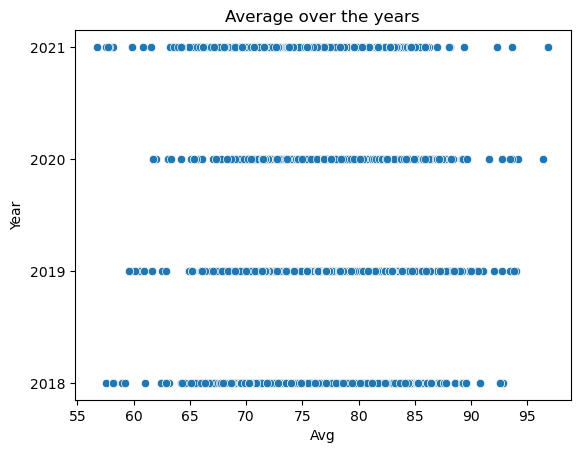

In [29]:

Grade_avg = sns.scatterplot(x="Avg", y="Year",data=df)
plt.yticks([2018, 2019, 2020, 2021])
plt.title('Average over the years')
plt.show()


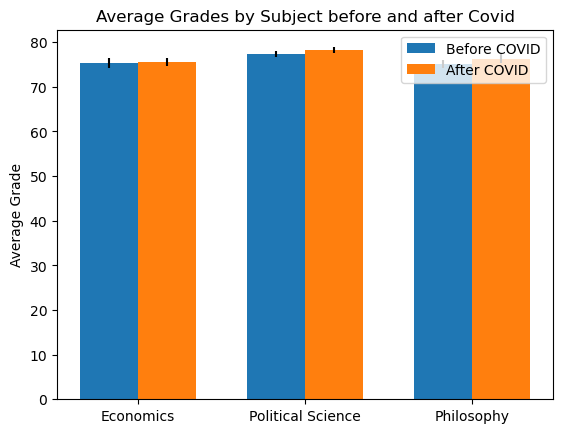

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the CSV data
df = pd.read_csv('../data/raw/rawdata.csv')

# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Calculate the average grade for each subject by year
df_econ = df[df['Subject'] == 'ECON'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()
df_poli = df[df['Subject'] == 'POLI'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()
df_phil = df[df['Subject'] == 'PHIL'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()

# Calculate the average grade for each subject before and after COVID
df_econ_pre = df_econ[df_econ['Year'] < 2020]['Avg']
df_econ_post = df_econ[df_econ['Year'] >= 2020]['Avg']
df_poli_pre = df_poli[df_poli['Year'] < 2020]['Avg']
df_poli_post = df_poli[df_poli['Year'] >= 2020]['Avg']
df_phil_pre = df_phil[df_phil['Year'] < 2020]['Avg']
df_phil_post = df_phil[df_phil['Year'] >= 2020]['Avg']

# Create a bar chart comparing the average grades for each subject before and after COVID
labels = ['Economics', 'Political Science', 'Philosophy']
pre_covid_means = [df_econ_pre.mean(), df_poli_pre.mean(), df_phil_pre.mean()]
post_covid_means = [df_econ_post.mean(), df_poli_post.mean(), df_phil_post.mean()]
pre_covid_stds = [np.std(df_econ_pre), np.std(df_poli_pre), np.std(df_phil_pre)]
post_covid_stds = [np.std(df_econ_post), np.std(df_poli_post), np.std(df_phil_post)]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, pre_covid_means, width, yerr=pre_covid_stds, label='Before COVID')
rects2 = ax.bar(x + width/2, post_covid_means, width, yerr=post_covid_stds, label='After COVID')

ax.set_ylabel('Average Grade')
ax.set_title('Average Grades by Subject before and after Covid')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()


Economics:
      Year        Avg
0  2018.0  74.145373
1  2019.0  76.369223
2  2020.0  76.566219
3  2021.0  74.630843
Political Science:
      Year        Avg
0  2018.0  76.783446
1  2019.0  77.936226
2  2020.0  78.871143
3  2021.0  77.586252
Philosophy:
      Year        Avg
0  2018.0  74.317710
1  2019.0  76.054796
2  2020.0  77.416563
3  2021.0  75.258388


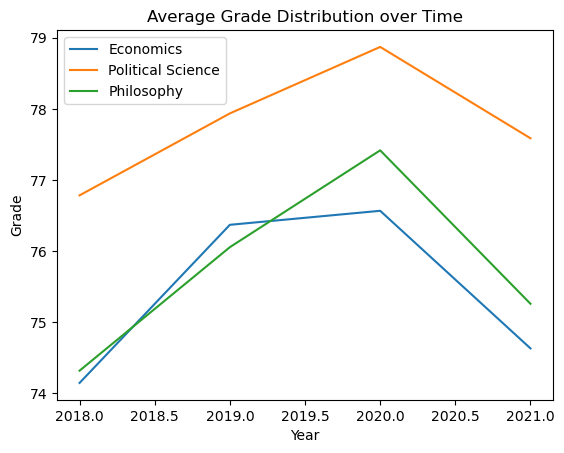

Mean and standard deviation of Economics grades:
Mean: 75.42791444685042 Standard deviation: 1.056176286764455
Mean and standard deviation of Political Science grades:
Mean: 77.79426656895487 Standard deviation: 0.7491399675965572
Mean and standard deviation of Philosophy grades:
Mean: 75.76186431789895 Standard deviation: 1.1361014334213713
Correlation between Economics grade and year: 0.17502391466271724
Correlation between Political Science grade and year: 0.49896694391589036
Correlation between Philosophy grade and year: 0.41172645336727054


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Convert the 'Year' column to datetime format
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Calculate the average grade for each subject by year
df_econ = df[df['Subject'] == 'ECON'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()
df_poli = df[df['Subject'] == 'POLI'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()
df_phil = df[df['Subject'] == 'PHIL'].groupby(df['Year'].dt.year)['Avg'].mean().reset_index()

# Check the first few rows of the DataFrames
print('Economics:\n', df_econ.head())
print('Political Science:\n', df_poli.head())
print('Philosophy:\n', df_phil.head())

# Plot a line chart of the average grade distribution over time for each subject
plt.plot(df_econ['Year'], df_econ['Avg'], label='Economics')
plt.plot(df_poli['Year'], df_poli['Avg'], label='Political Science')
plt.plot(df_phil['Year'], df_phil['Avg'], label='Philosophy')
plt.title('Average Grade Distribution over Time')
plt.xlabel('Year')
plt.ylabel('Grade')
plt.legend()
plt.show()

# Calculate the mean and standard deviation of the grade data for each subject
econ_mean = df_econ['Avg'].mean()
econ_std = np.std(df_econ['Avg'])
poli_mean = df_poli['Avg'].mean()
poli_std = np.std(df_poli['Avg'])
phil_mean = df_phil['Avg'].mean()
phil_std = np.std(df_phil['Avg'])

# Print the mean and standard deviation of the grade data for each subject
print('Mean and standard deviation of Economics grades:')
print('Mean:', econ_mean, 'Standard deviation:', econ_std)
print('Mean and standard deviation of Political Science grades:')
print('Mean:', poli_mean, 'Standard deviation:', poli_std)
print('Mean and standard deviation of Philosophy grades:')
print('Mean:', phil_mean, 'Standard deviation:', phil_std)

# Calculate the correlation between grade and year for each subject
econ_corr = df_econ['Year'].corr(df_econ['Avg'])
poli_corr = df_poli['Year'].corr(df_poli['Avg'])
phil_corr = df_phil['Year'].corr(df_phil['Avg'])

# Print the correlation between grade and year for each subject
print('Correlation between Economics grade and year:', econ_corr)
print('Correlation between Political Science grade and year:', poli_corr)
print('Correlation between Philosophy grade and year:', phil_corr)


In [32]:
df.drop(['Session', 'Detail', 'Section', 'Title', 'Professor', 'Median', 'Percentile (25)', 'Percentile (75)' ,'High' ,'Low' ,'50-54', '55-59', '60-63', '64-67', '68-71', '72-75', '76-79', '80-84', '85-89', '90-100'], axis=1, inplace=True)


In [33]:
# Save the updated DataFrame to a CSV file
df.to_csv('updated_data.csv', index=False)

# Print the contents of the CSV file
with open('updated_data.csv', 'r') as f:
    print(f.read())
    

Campus,Year,Subject,Course,Reported,Avg,<50
UBCO,2021-01-01,ECON,101.0,333.0,67.6,25.0
UBCO,2021-01-01,ECON,101.0,274.0,67.1,24.0
UBCO,2021-01-01,ECON,102.0,275.0,65.7,22.0
UBCO,2021-01-01,ECON,102.0,342.0,75.0,20.0
UBCO,2021-01-01,ECON,204.0,59.0,58.2,22.0
UBCO,2021-01-01,ECON,204.0,71.0,60.8,10.0
UBCO,2021-01-01,ECON,205.0,35.0,57.5,11.0
UBCO,2021-01-01,ECON,205.0,47.0,57.8,12.0
UBCO,2021-01-01,ECON,221.0,29.0,65.3,
UBCO,2021-01-01,ECON,232.0,38.0,74.0,
UBCO,2021-01-01,ECON,295.0,52.0,61.5,
UBCO,2021-01-01,ECON,308.0,28.0,63.7,
UBCO,2021-01-01,ECON,320.0,38.0,85.2,
UBCO,2021-01-01,ECON,327.0,64.0,63.2,9.0
UBCO,2021-01-01,ECON,328.0,47.0,77.1,
UBCO,2021-01-01,ECON,331.0,49.0,68.8,
UBCO,2021-01-01,ECON,339.0,28.0,64.9,
UBCO,2021-01-01,ECON,340.0,36.0,71.1,
UBCO,2021-01-01,ECON,340.0,34.0,75.0,
UBCO,2021-01-01,ECON,345.0,45.0,63.6,7.0
UBCO,2021-01-01,ECON,345.0,44.0,65.7,
UBCO,2021-01-01,ECON,351.0,37.0,72.1,
UBCO,2021-01-01,ECON,352.0,38.0,76.2,
UBCO,2021-01-01,ECON,355.0,31.0,78.4,
UB

In [37]:
import pandas as pd
import numpy as np

def load_data(file_path):
    # Load CSV file
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df):
    # Filter data for years 2018-2022
    df = df.query('Year >= 2018 & Year <= 2022')
    
    # Create a new column to indicate whether the data was collected before or after COVID
    df['Pre/Post-COVID'] = np.where(df['Year'] < 2020, 'Pre-COVID', 'Post-COVID')
    
    # Drop unnecessary columns
    columns_to_drop = ['Class Number', 'Course Title', 'Section', 'Instructor', 'Letter Grade', 'Plus/Minus', 'Unnamed: 9']
    df = df.drop(columns=columns_to_drop)
    
    return df

def group_data(df):
    # Group data by subject and pre/post COVID
    grouped_data = df.groupby(['Subject', 'Pre/Post-COVID']).agg({
        'Avg Grade Points': ['mean', 'median', 'std'],
        'Number of Students': 'sum'
    })
    
    # Rename columns
    grouped_data.columns = [' '.join(col).strip() for col in grouped_data.columns.values]
    
    # Reset the index
    grouped_data = grouped_data.reset_index()
    
    return grouped_data

def analyze_data(grouped_data):
    # Print summary statistics
    print('Average grade points by subject and pre/post COVID:')
    print(grouped_data[['Subject', 'Pre/Post-COVID', 'Avg Grade Points mean']].sort_values(by='Avg Grade Points mean', ascending=False))
    
    print('\nMedian grade points by subject and pre/post COVID:')
    print(grouped_data[['Subject', 'Pre/Post-COVID', 'Avg Grade Points median']].sort_values(by='Avg Grade Points median', ascending=False))
    
    print('\nStandard deviation of grade points by subject and pre/post COVID:')
    print(grouped_data[['Subject', 'Pre/Post-COVID', 'Avg Grade Points std']].sort_values(by='Avg Grade Points std', ascending=False))
    
    print('\nNumber of students by subject and pre/post COVID:')
    print(grouped_data[['Subject', 'Pre/Post-COVID', 'Number of Students']].sort_values(by='Number of Students', ascending=False))
